# Lectura de Corpus Sentences

In [13]:
from gensim.test.utils import datapath
from gensim import utils
from gensim.models import Word2Vec
import multiprocessing
from time import time

class MyCorpus(object):

    def __iter__(self):
        for line in open('./Data/resumenes.txt'):
            # assume there's one document per line, tokens separated by whitespace
            normalizar = str.maketrans('áéíóúü','aeiouu')
            yield utils.simple_preprocess(line.translate(normalizar).lower())

In [14]:
resumenes = MyCorpus()
# f = list(resumenes)
# f[:3]

# Definicion de Modelo

In [15]:
def entrenamiento(sentences):
        
             
        #Entrenamiento del modelo
        cores = multiprocessing.cpu_count() #cuenta el nro de nucles de la pc

        w2v = Word2Vec(size=300, #Dimensionalidad Palabras Vector
               window=5, #Contexto, distancia entre palabras predichas
               min_count=1, #Minimo de palabras a buscar
               workers=cores, #En mi CPU
               sg=1, #Usamos el Modelo SkipGram
               hs=0, #Cero para negative sampling, castigo a neurona
               negative=20, #Palabras irrelevantes para el muestreo negativo
               ns_exponent=-0.5, #Muestrea frecuencias por igual,
               alpha=0.015, #Tasa de aprendizaje
               min_alpha=0.0001, #Tasa que se reducira durante el train
               seed=25, #Semilla generar hash para palabras
               max_vocab_size=None, #Dependera de la maquina 10M -> 1GB
               sample=5, #Reduccion para palabras con alta frecuencia
               iter=150, #Epocas, valores altos sobreentreno )?
               compute_loss=True #Muestra valor de perdida en el train
              )
        
        t = time()
        w2v.build_vocab(sentences, #Oraciones nuevas
               #update=True, #Agregar nuevo vocabulario
               progress_per=100000, #Palabras para procesar con antecipacion
               min_count=1
              ) # prepare the model vocabulary
        print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))
        t = time()
        w2v.train(sentences, total_examples=w2v.corpus_count, epochs=w2v.iter ,report_delay=3)
        print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))
        
        return w2v
        

**Entramiento modelo 1**

In [16]:
#Modelo V1 Entramiento con sentence = resumen
modelo1 = entrenamiento(resumenes)

Time to build vocab: 0.08 mins


/home/sangeeky/anaconda3/envs/tesis/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


Time to train the model: 11.02 mins


# Modelos y Cambios
- Modelo 1: Original 7 Min Bacano
- Modelo 2: 500 Epocas 18 Min
- Modelo 3: 1000 Epocas 38 Min
- Modelo 4: Alpha 0,0015 - 0,0001 iter=150  6 Min Bacano
- Modelo 5: Window=5, Alpha 0,0015 - 0,0001 iter=150 9 Min Me gusta mas
- Modelo 6: Window=5, Alpha 0,0015 - 0,0001 iter=500 26 No gusta
- MOdelo 7: Window=5, Alpha 0,0015 - 0,0001 ns_exponent=-0.5 iter=150 HERMOSOOO
- Modelo 8(Sin tildes): Window=5, Alpha 0,0015 - 0,0001 ns_exponent=-0.5 iter=150

In [17]:
modelo1.save("./Modelos/modelo8.model")

In [32]:
word='galerasnet'
modelo1.wv.similar_by_word(word, topn=20, restrict_vocab=None)

[('computer', 0.864803671836853),
 ('agorithms', 0.857390284538269),
 ('marleni', 0.82231205701828),
 ('franco', 0.8209389448165894),
 ('gelpud', 0.8205360770225525),
 ('engineering', 0.8126680254936218),
 ('guaquez', 0.8054901957511902),
 ('joaquin', 0.7988961935043335),
 ('esteban', 0.7951070070266724),
 ('science', 0.7935398817062378),
 ('education', 0.7848023176193237),
 ('potenciara', 0.7492794990539551),
 ('marcela', 0.7247180938720703),
 ('alvaro', 0.7235240936279297),
 ('sandra', 0.7184275388717651),
 ('alfonso', 0.7134847640991211),
 ('libreria', 0.7109725475311279),
 ('galarza', 0.6991942524909973),
 ('ceballos', 0.6982079148292542),
 ('method', 0.6976240873336792)]

In [29]:
modelo1.wv.similarity('datos', 'mineria')

0.51897746

In [31]:
modelo1.total_train_time

456.51715938696725

/home/sangeeky/anaconda3/envs/tesis/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


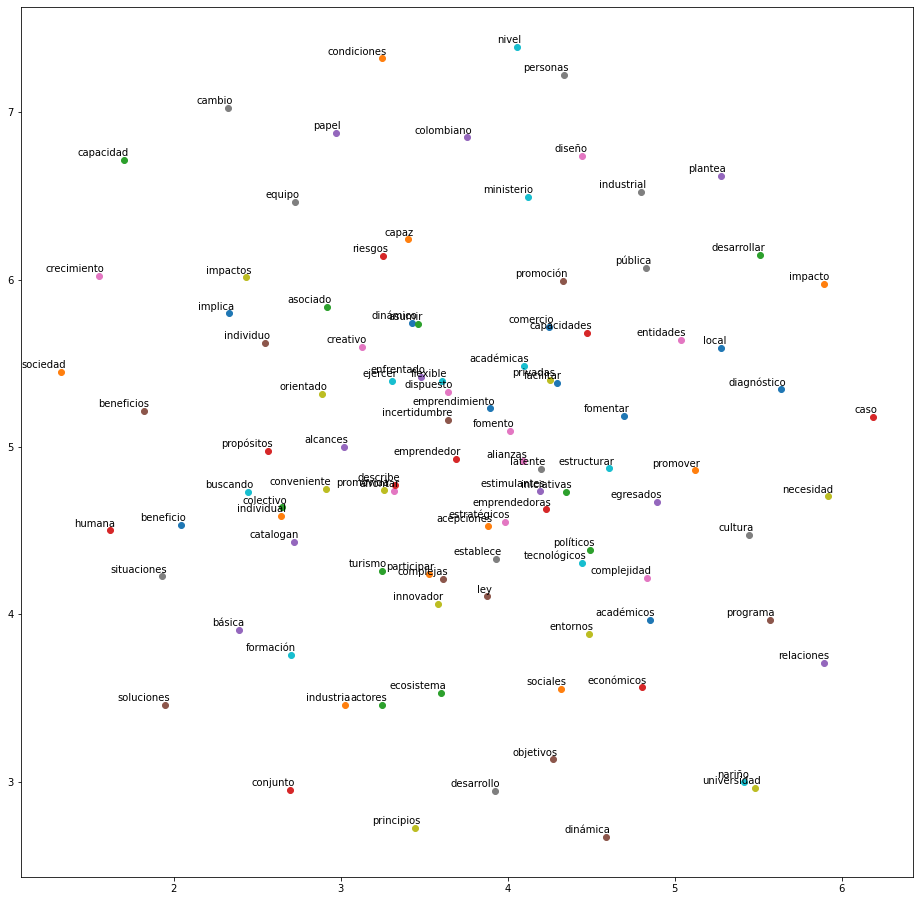

In [18]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for counter, word in enumerate(model.wv.vocab):
        if counter == 100:
            break
        tokens.append(model[word])
        labels.append(word)
        

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

    
grafica = Word2Vec.load('./Modelos/modelo8.model')
tsne_plot(grafica)

In [1]:
w2v = Word2Vec(size=300, #Dimensionalidad Palabras Vector
               window=3, #Contexto, distancia entre palabras predichas
               min_count=1, #Minimo de palabras a buscar
               workers=4, #En mi CPU
               sg=1, #Usamos el Modelo SkipGram
               hs=0, #Cero para negative sampling, castigo a neurona
               negative=20, #Palabras irrelevantes para el muestreo negativo
               ns_exponent=0, #Muestrea frecuencias por igual,
               alpha=0.025, #Tasa de aprendizaje
               min_alpha=0.0005, #Tasa que se reducira durante el train
               seed=25, #Semilla generar hash para palabras
               max_vocab_size=None, #Dependera de la maquina 10M -> 1GB
               sample=5, #Reduccion para palabras con alta frecuencia
               iter=150, #Epocas, valores altos sobreentreno )?
               compute_loss=True #Muestra valor de perdida en el train
              )

In [5]:
w2v.build_vocab(corpus_file='./Data/resumenes.txt')

In [ ]:
#Vocabulario con Diccionario de freq
w2v.build_vocab_from_freq(dictionary_resumenes)
#Voacabulario con letras
#w2v.build_vocab(setences, #Oraciones nuevas
#                corpus_file=path #txt
#                update=True, #Agregar nuevo vocabulario
#                progress_per=100000 #Palabras para procesar con antecipacion
#                 min_count=1
#               )


In [ ]:
w2v.train(sentences, total_examples=w2v.corpus_count, report_delay=3)